# FaceRecognition Using PCA

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import glob
import random
import re

I have used the orl dataset. Considering fifteen different people each having 10 photos in the dataset. I have used 5 photos for training and the remaining 5 photos for testing purpose. Here in the function get_filenames all the file locations of train and test images will be returned so that they can be loaded later easily. 

In [2]:
def get_filenames(X, train=True):
    img_locations = []
    for i in range(15):
        for j in range(X):
            if(train):
                img_locations.append("images/s{}/{}.pgm".format(i+1, j+1))
            else:
                img_locations.append("images/s{}/{}.pgm".format(i+1, j+10-X+1))
    return img_locations

Given the locations of images as input this below funtion generates the train and test data with their corresponding labels.

In [3]:
def load_data(img_locs):
    X, Y = [], []
    for loc in img_locs:
        img = np.array(Image.open(loc)).flatten()
        label = re.findall("[0-9]+/",loc)[0]
        label = int(label[:-1])
        X.append(img), Y.append(label)
    return np.array(X), np.array(Y)

The below view data function is used to display the images used for training and testing.

In [4]:
def view_data(imgs, w, h):
    x = len(imgs)/ 5
    count = 1
    for img in imgs:
        i = img.reshape(w, h)
        plt.subplot(x, 5, count)
        plt.imshow(i, cmap='gray')
        plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
        count += 1
        
    plt.show()

Here is the PCA class whose model is created, training and testing procedure are described in pdf attached.

In [5]:
class PCA:
    
    def get_mean(self, imgs):
        return np.mean(imgs, axis=0)

    def train(self, imgs, classes, K):
        self.mean = self.get_mean(imgs)
        self.Y = classes
        imgs = imgs - self.mean
        C = np.cov(imgs)
        w, v = np.linalg.eig(C)

        p = w.argsort()[::-1]
        # print(p)
        sorted = v[w.argsort()[::-1]]
        shi = sorted[:K].T
        phi = shi.T.dot(imgs)
        signature = phi.dot(imgs.T)
        return phi, signature

    def test(self, image, signature, phi):
        image = image - self.mean
        # print(image.shape)
        sigma = phi.dot(image)
        dists = []
        for i in range(signature.shape[1]):
            dist = np.linalg.norm(sigma-signature[:,i])
            dists.append(dist)
        dists = np.array(dists)
        min_ind = np.argmin(dists)
        return self.Y[min_ind]
    

The below function calculates the accuracy

In [6]:
def calculate_acc(YY, test_y):
    count = 0
    correct = 0
    wrong = 0
    for i in range(len(YY)):
        if(YY[i] == test_y[i]):
            correct += 1
        else:
            wrong += 1
            
        count += 1
    
    acc = correct / count
    return acc, correct, count
    

Train images


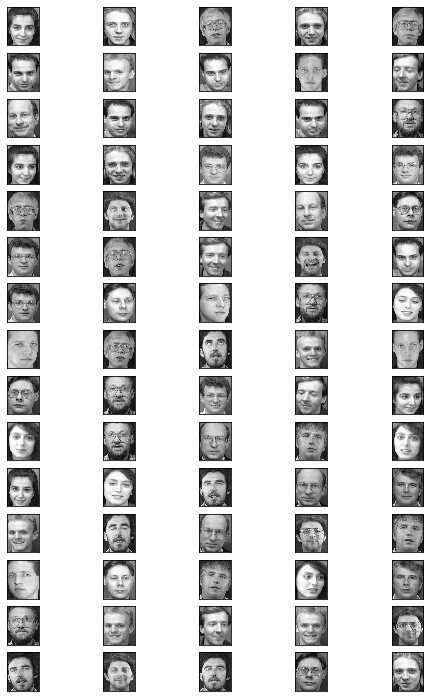

Test images


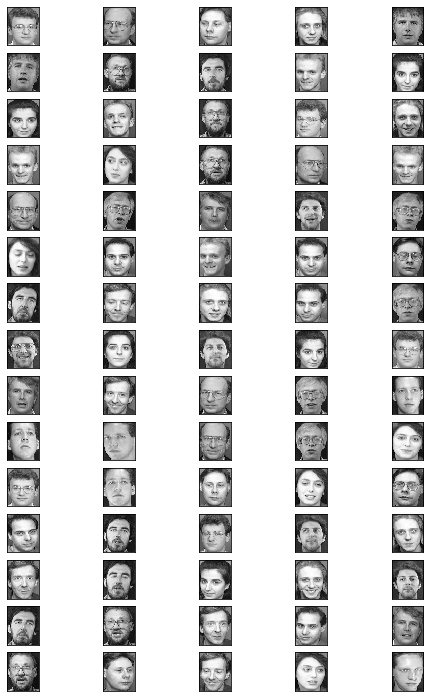

In [7]:
train_img_loc = get_filenames(5)
test_imag_loc = get_filenames(5, train=False)

random.shuffle(train_img_loc)
random.shuffle(test_imag_loc)

w, h = np.array(Image.open(train_img_loc[0])).shape

train_imgs, train_classes = load_data(train_img_loc)
test_imgs, test_classes = load_data(test_imag_loc)

print("Train images")
view_data(train_imgs, w, h)

print("Test images")
view_data(test_imgs, w, h)

Here below train and test on the images is performed, considering the number of principle components to be 15. Later after this i've tried to figure out the best k for which the accuracy is maximum.

Mean Face


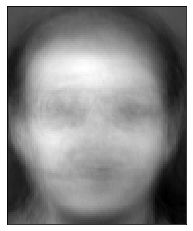

TRAINING...done
TESTING...done

Accuracy: 0.8533333333333334


In [8]:
model = PCA()

print("Mean Face")
plt.imshow(model.get_mean(train_imgs).reshape(w,h), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

k = 15
phi , signature = model.train(train_imgs, train_classes, k)
print("TRAINING...done")
preds = []
for i in range(len(test_imgs)):
    out = model.test(test_imgs[i], signature, phi)
    preds.append(out)
print("TESTING...done")
print()

acc, correct, count = calculate_acc(preds, test_classes)
print("Accuracy: {}".format(acc))

Here below I've tried to find out the k for which the accuracy is highest and draw a plot for k vs accuracy.
Where k is the number of principle components.

Accuracy for k = 0: 0.06666666666666667
Accuracy for k = 1: 0.2
Accuracy for k = 2: 0.4266666666666667
Accuracy for k = 3: 0.5066666666666667
Accuracy for k = 4: 0.6133333333333333
Accuracy for k = 5: 0.72
Accuracy for k = 6: 0.72
Accuracy for k = 7: 0.8266666666666667
Accuracy for k = 8: 0.8666666666666667
Accuracy for k = 9: 0.8533333333333334
Accuracy for k = 10: 0.8666666666666667
Accuracy for k = 11: 0.8533333333333334
Accuracy for k = 12: 0.8533333333333334
Accuracy for k = 13: 0.84
Accuracy for k = 14: 0.8533333333333334
Accuracy for k = 15: 0.8533333333333334
Accuracy for k = 16: 0.8533333333333334
Accuracy for k = 17: 0.8666666666666667
Accuracy for k = 18: 0.88
Accuracy for k = 19: 0.88
Accuracy for k = 20: 0.88
Accuracy for k = 21: 0.88
Accuracy for k = 22: 0.88
Accuracy for k = 23: 0.8666666666666667
Accuracy for k = 24: 0.8666666666666667
Accuracy for k = 25: 0.88
Accuracy for k = 26: 0.8933333333333333
Accuracy for k = 27: 0.8933333333333333
Accuracy for k = 28: 0.8933333

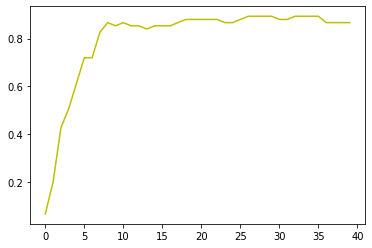

The maximum accuracy of 0.8933333333333333 is observed at k = 26


In [9]:
accs = []
maxa, maxk = 0, 0
for i in range(40):
    phi , signature = model.train(train_imgs, train_classes, i)
    preds = []
    for j in range(len(test_imgs)):
        out = model.test(test_imgs[j], signature, phi)
        preds.append(out)
    
    
    acc, correct, count = calculate_acc(preds, test_classes)
    print("Accuracy for k = {}: {}".format(i, acc))
    if(acc > maxa):
        maxa = acc
        maxk = i
    accs.append(acc)

accs = np.array(accs)
plt.plot(range(len(accs)), accs, '-y', label='K vs acc')
plt.show()

print("The maximum accuracy of {} is observed at k = {}".format(maxa, maxk))